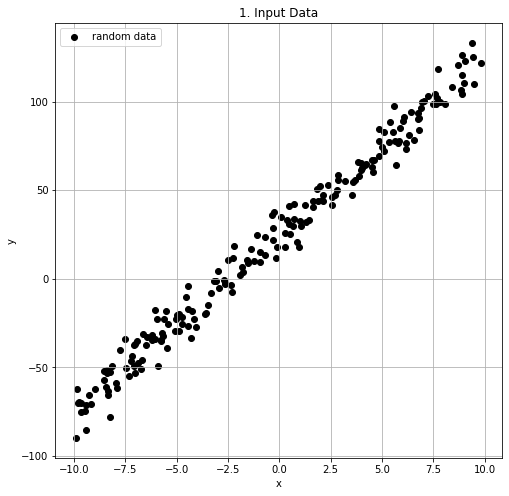

In [5]:
import numpy as np
import matplotlib.pyplot as plt

path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x_data = data[:, 0]
y_data = data[:, 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_data, y_data, c = 'black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('1. Input Data')
plt.legend(['points fro'])
plt.grid()
plt.show()
